In [117]:
include("logistic.jl")
using Distributions
using Plots
using Zygote

In [253]:
w = [0.1, 0.2, 0.3, 0.4]
x = [[2., 3., 5, 6.], [-1., 2., 5., 6.]]
b = -1.
@time p(w, b, x)
y = [1, 0]
@time LL(y, w, b, x)
@time loss(y, w, b, x)


  0.000013 seconds (6 allocations: 512 bytes)
  0.000013 seconds (8 allocations: 608 bytes)
  0.000011 seconds (9 allocations: 624 bytes)


3.26437617909621

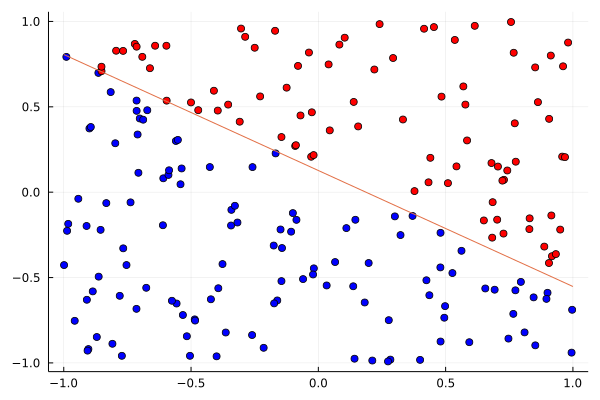

In [3]:
d = Uniform(-1, 1)
n = 200
X = [rand(d, 2) for s in 1:n]
W = rand(2)
B = rand(1)
Y = Int.(0.5 .* sign.(l(W, X) .+ B .- 0.5) .+ 0.5)

X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]
function color(y)
    if y == 1
        return :red
    else
        return :blue
    end
end
mcols = color.(Y)
plot(X1, X2, markercolor=mcols, seriestype=:scatter)
x1_test = Array(LinRange(-1, 1, 10))
plot!(x1_test, (0.5 .- W[1] .* x1_test .- B) ./ W[2], legend=false)

107.15177624861886
110.99529875907314
27.505258824123626


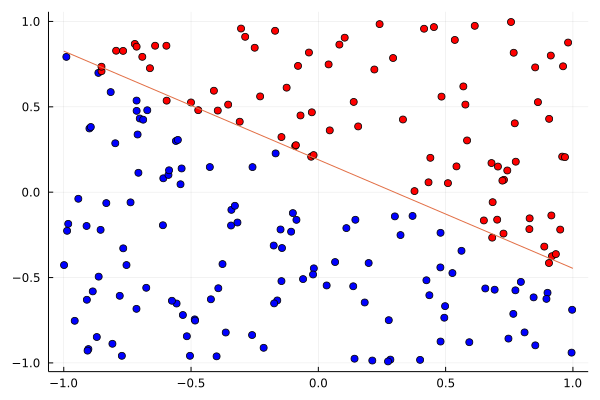

In [4]:
wi, bi = rand(2), rand(1)...
w, b = step!(Y, wi, bi, X)
for i in 1:1000
    w, b = step!(Y, w, b, X)
end
println(loss(Y, W, B, X))
println(loss(Y, wi, bi, X))
println(loss(Y, w, b, X))
plot(X1, X2, markercolor=mcols, seriestype=:scatter)
x1_test = Array(LinRange(-1, 1, 10))
plot!(x1_test, (0.5 .- w[1] .* x1_test .- b) ./ w[2], legend=false)


In [128]:
W1 = rand(d, 5, 2)
B1 = rand(5)
W2 = rand(d, 1, 5)
B2 = rand(1)

1-element Vector{Float64}:
 0.28031432197898554

In [129]:
n = 100
X = []
Y = []
∇SS = []
∇WS = []
∇BS = []
for i in 1:n
    x = rand(2)
    y, ∇ss, ∇ws, ∇bs = network([W1, W2], [B1, B2], x)
    X = append!(X, [x])
    ∇SS = append!(∇SS, [∇ss])
    ∇WS = append!(∇WS, [∇ws])
    ∇BS = append!(∇BS, [∇bs])
    Y = append!(Y, y)
end

In [131]:
Yt = []
for x in X
    if x[1]^2 + x[2]^2 < 0.5
        Yt = append!(Yt, Int64(1))
    else
        Yt = append!(Yt, Int64(0))
    end
end
Yt;

In [132]:
LL(Yt, Y)

-71.71649178266735

In [133]:
∇W1S = []
for i in 1:n
    ∇W1 = -∇LL_p(Yt[i], Y[i]) * ∇SS[i][2] .* ∇SS[i][1] .* ∇WS[i][1]
    ∇W1S = append!(∇W1S, [∇W1])
end
∇W1 = sum(∇W1S)
∇B1S = []
for i in 1:n
    ∇B1 = -∇LL_p(Yt[i], Y[i]) * ∇SS[i][2] .* ∇SS[i][1] .* ∇BS[i][1]
    ∇B1S = append!(∇B1S, [∇B1])
end
∇B1 = sum(∇B1S)
∇W2S = []
for i in 1:n
    ∇W2 = -∇LL_p(Yt[i], Y[i]) * ∇SS[i][2] .* ∇WS[i][2]
    ∇W2S = append!(∇W2S, [∇W2])
end
∇W2 = sum(∇W2S)
∇B2S = []
for i in 1:n
    ∇B2 = -∇LL_p(Yt[i], Y[i]) * ∇SS[i][2] .* ∇BS[i][2]
    ∇B2S = append!(∇B2S, [∇B2])
end
∇B2 = sum(∇B2S)

1-element Vector{Float64}:
 -1.9613289999449237

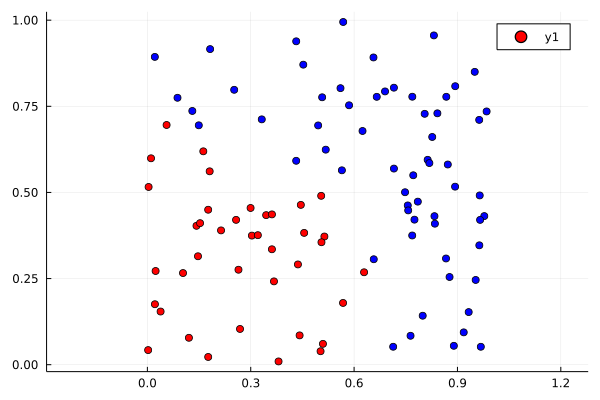

In [136]:
X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]
mcols = color.(Yt)
plot(X1, X2, markercolor=mcols, seriestype=:scatter, aspectratio=1.)

1252.31854137516
290.6525848897292


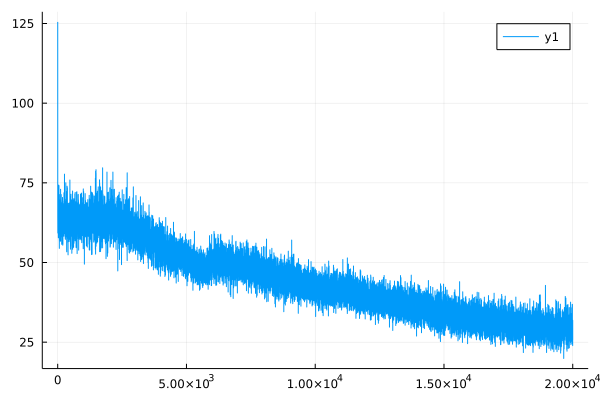

In [384]:
n = 1000

W1 = rand(d, 40, 2)
B1 = rand(40)
W2 = rand(d, 1, 40)
B2 = rand(1)

X = []
Y = []
∇SS = []
∇WS = []
∇BS = []
for i in 1:n
    x = rand(2)
    y, ∇ss, ∇ws, ∇bs = network([W1, W2], [B1, B2], x)
    X = append!(X, [x])
    ∇SS = append!(∇SS, [∇ss])
    ∇WS = append!(∇WS, [∇ws])
    ∇BS = append!(∇BS, [∇bs])
    Y = append!(Y, y)
end

Yt = []
# for x in X
#     if sin(π * x[1]) + cos(π * x[2]) < 0.
#         Yt = append!(Yt, Int64(1))
#     else
#         Yt = append!(Yt, Int64(0))
#     end
# end
for x in X
    if (x[1] - 0.5)^2 + (x[2] - 0.5)^2 < 0.1
        Yt = append!(Yt, Int64(1))
    else
        Yt = append!(Yt, Int64(0))
    end
end
# for x in X
#     if (x[1] - 0.25)^2 + (x[2] - 0.75)^2 < 0.05
#         Yt = append!(Yt, Int64(1))
#     elseif (x[1] - 0.75)^2 + (x[2] - 0.25)^2 < 0.05
#         Yt = append!(Yt, Int64(1))
#     else
#         Yt = append!(Yt, Int64(0))
#     end
# end

println(loss(Yt, Y))

losses = []

α = 1e-2
ns = 100
for i in 1:20000
    nums = ceil.(rand(1:n, ns))
    XS = X[nums]
    YtS = Yt[nums]
    Y = []
    ∇SS = []
    ∇WS = []
    ∇BS = []
    for i in 1:ns
        y, ∇ss, ∇ws, ∇bs = network([W1, W2], [B1, B2], XS[i])
        ∇SS = append!(∇SS, [∇ss])
        ∇WS = append!(∇WS, [∇ws])
        ∇BS = append!(∇BS, [∇bs])
        Y = append!(Y, y)
    end
    ∇W1S = []
    for i in 1:ns
        ∇W1 = -∇LL_p(YtS[i], Y[i]) * ∇SS[i][2] .* ∇SS[i][1] .* ∇WS[i][1]
        ∇W1S = append!(∇W1S, [∇W1])
    end
    ∇W1 = sum(∇W1S)
    ∇B1S = []
    for i in 1:ns
        ∇B1 = -∇LL_p(YtS[i], Y[i]) * ∇SS[i][2] .* ∇SS[i][1] .* ∇BS[i][1]
        ∇B1S = append!(∇B1S, [∇B1])
    end
    ∇B1 = sum(∇B1S)
    ∇W2S = []
    for i in 1:ns
        ∇W2 = -∇LL_p(YtS[i], Y[i]) * ∇SS[i][2] .* ∇WS[i][2]
        ∇W2S = append!(∇W2S, [∇W2])
    end
    ∇W2 = sum(∇W2S)
    ∇B2S = []
    for i in 1:ns
        ∇B2 = -∇LL_p(YtS[i], Y[i]) * ∇SS[i][2] .* ∇BS[i][2]
        ∇B2S = append!(∇B2S, [∇B2])
    end
    ∇B2 = sum(∇B2S)
    W1 = W1 - α * ∇W1
    W2 = W2 - α * ∇W2
    B1 = B1 - α * ∇B1
    B2 = B2 - α * ∇B2
    losses = append!(losses, loss(YtS, Y))
end
Yp = []
Y = []
for x in X
    y, ∇ss, ∇ws, ∇bs = network([W1, W2], [B1, B2], x)
    Y = append!(Y, y)
end
println(loss(Yt, Y))
X1 = [X[i][1] for i in 1:n]
X2 = [X[i][2] for i in 1:n]
for y in Y
    if y < 0.5
        Yp = append!(Yp, 0)
    else
        Yp = append!(Yp, 1)
    end
end
function decision(x, y)
    return network([W1, W2], [B1, B2], [x, y])[1][1]
end
plot(losses)

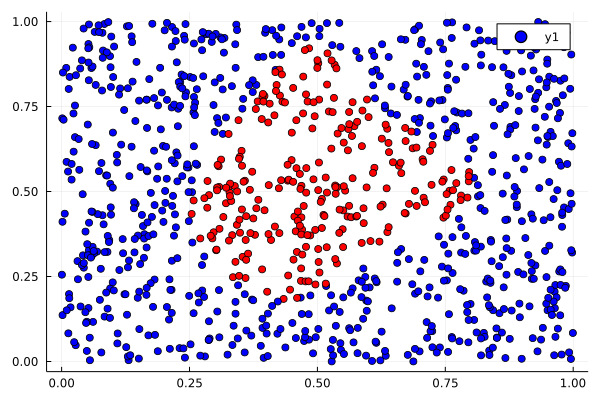

In [385]:
plot(X1, X2, markercolor=color.(Yp), seriestype=:scatter)

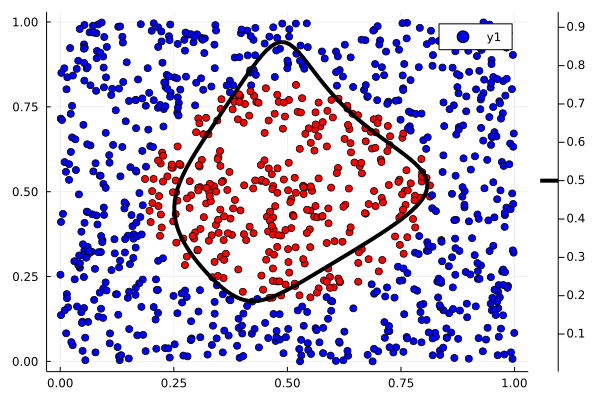

In [386]:
xs = Array(LinRange(0, 1, 100))
ys = Array(LinRange(0, 1, 100))
plot(X1, X2, markercolor=color.(Yt), seriestype=:scatter)
contour!(xs, ys, decision, levels=[0.5], linewidth=4, color=:black)

In [402]:
rand(2, 3)

2×3 Matrix{Float64}:
 0.351003  0.508084  0.910831
 0.772795  0.282556  0.553018

In [404]:
square = map(x -> x^2)

LoadError: UndefVarError: u not defined